<a href="https://colab.research.google.com/github/tejinderpa/Deep-Learning/blob/Going-Deep/LeNET_5(Architecture).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
# 1. Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to fit LeNet-5 input (32x32x1 instead of 28x28)
x_train = tf.image.resize_with_pad(x_train[..., tf.newaxis], 32, 32) / 255.0
x_test = tf.image.resize_with_pad(x_test[..., tf.newaxis], 32, 32) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 2. Build LeNet-5 model
model = Sequential()

# Layer 1: Conv -> AvgPool
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', padding='valid', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Layer 2: Conv -> AvgPool
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten before dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 3. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# 4. Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.8126 - loss: 0.6442 - val_accuracy: 0.9627 - val_loss: 0.1356
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 82ms/step - accuracy: 0.9567 - loss: 0.1442 - val_accuracy: 0.9752 - val_loss: 0.0891
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9740 - loss: 0.0856 - val_accuracy: 0.9793 - val_loss: 0.0708
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 73ms/step - accuracy: 0.9809 - loss: 0.0639 - val_accuracy: 0.9783 - val_loss: 0.0720
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 95ms/step - accuracy: 0.9848 - loss: 0.0512 - val_accuracy: 0.9822 - val_loss: 0.0565
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - accuracy: 0.9871 - loss: 0.0423 - val_accuracy: 0.9835 - val_loss: 0.0556
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.9893 - loss: 0.0336 - val_accuracy: 0.9875 - val_loss: 0.0474
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9920 - loss: 0.0255 - 

In [7]:
# 5. Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9811 - loss: 0.0578
Test Accuracy: 98.60%


#Visualization of Predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


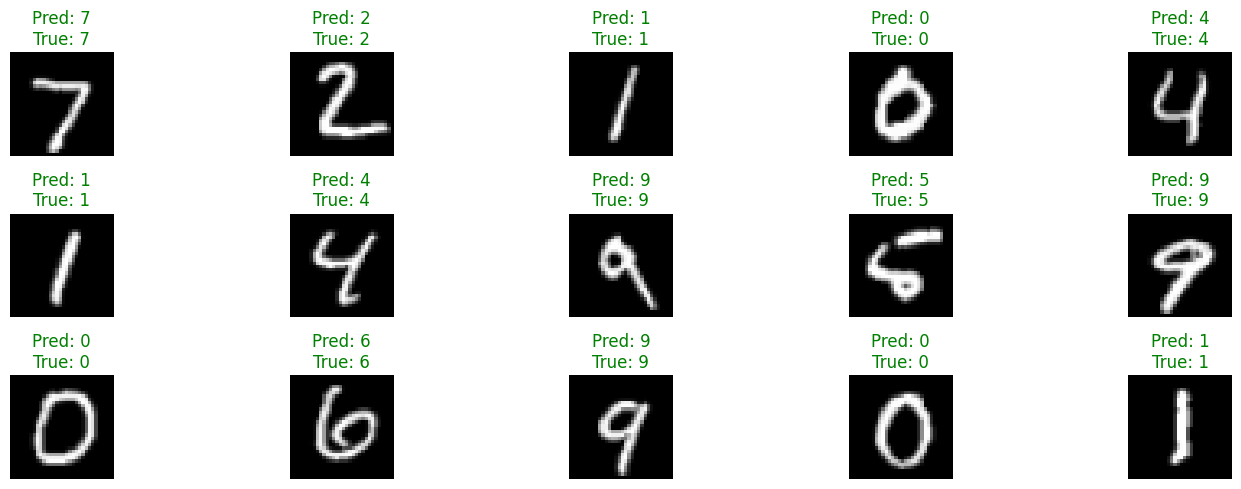

In [8]:
# Predict the classes
y_pred = model.predict(x_test)
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Plot a few test images with predictions
num_images = 15
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].numpy().squeeze(), cmap='gray')
    pred_label = predicted_classes[i]
    true_label = true_classes[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()


#Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


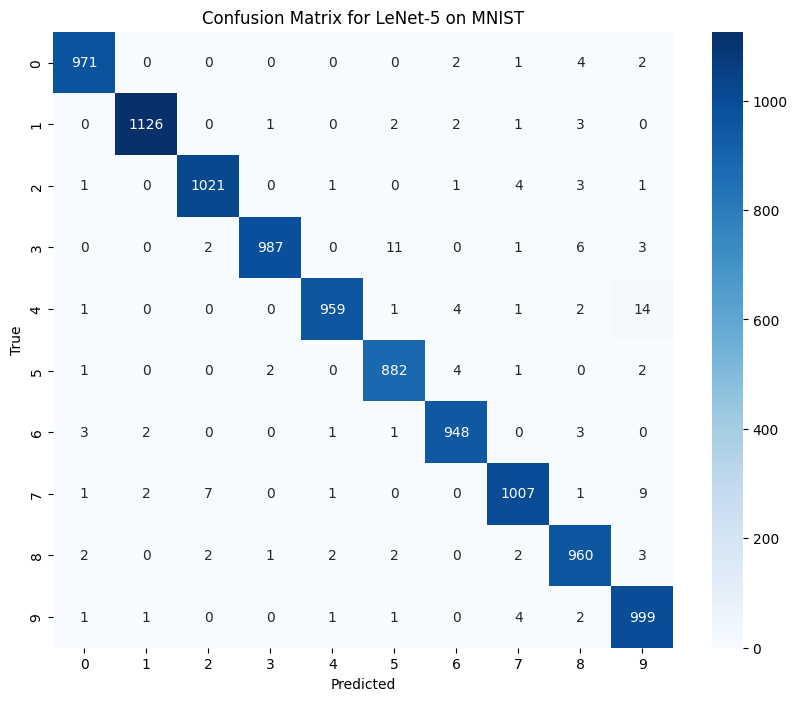

In [9]:
# Compute predictions and true labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot it using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for LeNet-5 on MNIST')
plt.show()
